# Declaration of google drive folders and files

<h3>Import Google colab to load the google drive</h3>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


<h3>Import Required Packages</h3>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import math

<h3>Declare fido test videos and training images file path</h3>

In [0]:
fido_images_path = '/content/gdrive/My Drive/Capstone/Characters/FidoDido/Images/'
fido_videos_path = '/content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/'
os.listdir(fido_videos_path)

['FidoDidoV1.webm',
 'FidoDidoV2.webm',
 'FidoDidoV3.webm',
 'FidoDidoV4.webm',
 'FidoDidoV5.webm',
 'FidoDidoV6.webm',
 'FidoDidoV7.webm',
 'FidoDidoV8.webm',
 'FidoDidoV9.webm',
 'VidOutput',
 'VidImg',
 'samplecut.webm',
 'summ_FidoDidoV9.webm',
 'summ_1_FidoDidoV6.webm',
 'summ_1_FidoDidoV3.webm',
 'summ_1_FidoDidoV9.webm',
 'summ_1_FidoDidoV7.webm',
 '.ipynb_checkpoints']

<h3>Declare MickeyMouse test videos and training images file path</h3>

In [0]:
mm_images_path = '/content/gdrive/My Drive/Capstone/Characters/MickeyMouse/Images/'
mm_videos_path = '/content/gdrive/My Drive/Capstone/Characters/MickeyMouse/Videos/'
os.listdir(mm_videos_path)

['MMV1.mp4',
 'VidImg',
 'VidOutput',
 'MMV2.webm',
 'MM_V5.mp4',
 'MM_V3.mp4',
 'MM_V4.mp4',
 'summ_1_MM_V3.mp4']

<h3>Declare MrBean test videos and training images file path</h3>

In [0]:
mb_images_path = '/content/gdrive/My Drive/Capstone/Characters/MrBean/Images/'
mb_videos_path = '/content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/'
os.listdir(mb_videos_path)

['VidImg',
 'MB_V4.mp4',
 'MB_V3.mp4',
 'MB_V2.mp4',
 'MB_V1.mp4',
 'VidOutput',
 'MB_V6.mp4',
 'MB_V5.mp4',
 'MB_V4_1.mp4',
 'MB_V4_2.mp4',
 'summ_1_MB_V4_1.mp4',
 'summ_1_MB_V4_2.mp4',
 'summ_1_MB_V4.mp4',
 '.ipynb_checkpoints',
 'FC_V4_1.mp4',
 'FC_V4_2.mp4',
 'FC_V4_3.mp4']

<h3>Declare FelixTheCat test videos and training images file path</h3>

In [0]:
fc_images_path = '/content/gdrive/My Drive/Capstone/Characters/Felix/Images/'
fc_videos_path = '/content/gdrive/My Drive/Capstone/Characters/Felix/Videos/'
os.listdir(fc_videos_path)

['FC_V1.webm',
 'VidImg',
 'FC_V2.mp4',
 'FC_V3.mp4',
 'FC_V4.mp4',
 'VidOutput',
 'summ_1_FC_V4.mp4',
 'FC_V4_1.mp4',
 'FC_V4_2.mp4',
 'FC_V4_3.mp4',
 'summ_1_FC_V4_1.mp4',
 'summ_1_FC_V4_2.mp4',
 'summ_1_FC_V4_3.mp4']

> # Return frames per second for a video

<h3>Return frames per second for a video</h3>

In [0]:
cv2.__version__

'3.4.3'

In [0]:
def returnFps(imgFileWithPath):
  import cv2
  if __name__ == '__main__' :

      video = cv2.VideoCapture(imgFileWithPath);

      # Find OpenCV version
      (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

      if int(major_ver)  < 3 :
          fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
          print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
      else :
          fps = video.get(cv2.CAP_PROP_FPS)
          print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

      video.release(); 
      if (fps == 1000.0):
        fps = 25.0
      return fps

In [0]:
np.int(np.round(returnFps(mm_videos_path+'MMV2.webm')))

Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.97002997002997


30

> # Custom function to create and delete folder

<h3>Custom function to create folder</h3>

In [0]:
import os

def createFolder(directory):# creates a folder in the location mentioned
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
    

<h3>Custom function to delete folder</h3>

In [0]:
def deleteFile(file):# creates a folder in the location mentioned
    import os
    import shutil
    try:
        if(file.__contains__('.')):
          if(os.path.exists(file)):
            os.remove(file)
        else:
          if(os.path.exists(file)):
            shutil.rmtree(file)
    except OSError:
        print ('Error: Removing file. ' +  file + OSError.with_traceback())

In [0]:
#deleteFile('/content/gdrive/My Drive/Capstone/Characters/MickeyMouse/Videos/VidOutput/MMV2/')

In [0]:
# Example
#createFolder(fc_videos_path+'VidImg/')
# Creates a folder in the current directory called data

# VideoSummarizer

> # <h3>Code to convert videos to image frames</h3>

In [0]:
def convertVideoToImgFrames(videoPath, videoFile, imgFrameFolder,fps):
  count = 0
  print('fps value inside convertVideoToImgFrames method is ',fps)
  if(fps=='original'):
    origFrameRate = np.round(returnFps(videoPath+videoFile))
    print("Original frame rate is ",origFrameRate)
  else:
    origFrameRate = fps
    print("frame rate taken for processing is ",origFrameRate)
  videoFileName = videoFile.split('.')[0]
  deleteFile(videoPath+imgFrameFolder+'/'+videoFileName+'/')
  createFolder(videoPath+imgFrameFolder)
  createFolder(videoPath+imgFrameFolder+'/'+videoFileName+'/')
  cap = cv2.VideoCapture(videoPath+videoFile)   # capturing the video from the given path
  frameRateCapture = origFrameRate #frameRateCapture
  #frameRate = cap.get(5) #frame rate
  x=1
  while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
          break
      if(fps != 'original'):
        if (frameId % math.floor(frameRateCapture) == 0):
          filename ="frame%d.jpg" % count;count+=1
          cv2.imwrite(videoPath+imgFrameFolder+'/'+videoFileName+'/'+filename, frame)
      else:
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(videoPath+imgFrameFolder+'/'+videoFileName+'/'+filename, frame)
  cap.release()
  print ("Done!")

> # <h3>Load Saved model and weights</h3>

In [0]:
def loadModelAndWeights(modelJsonFile, modelWeightsFile):
  #  ---------------Load model and weights from disk-------------  #
  from tensorflow.keras.models import model_from_json

  # load json from saved location 

  json_file = open(modelJsonFile, 'r')
  loaded_model_json = json_file.read()
  json_file.close()

  # create model from json and load weights

  model = model_from_json(loaded_model_json)

  model.load_weights(modelWeightsFile)

  return model

In [0]:
# Compile the model
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

> # <h3>Preprocess image frames from video</h3>

In [0]:
def preProcessVideoToImgFrmArray(videosPath, videoFile, imgFrameFolder, model_input_shape):
  videoFileName = videoFile.split('.')[0]
  vid_img_frame_path = videosPath+imgFrameFolder+'/'+videoFileName+'/'
  fd_frameX=[]
  img_frame_name=[]
  for frame in os.listdir(vid_img_frame_path):
    fd_frameX.append(cv2.resize(cv2.imread(vid_img_frame_path+frame),model_input_shape)/255)
    img_frame_name.append(frame)
  return fd_frameX,img_frame_name

> # <h3>Predict the probability of the cartoon character in a particular image frame</h3>


*   Predict probability of the particular character in the images frames 
*   Seggregate frames with and without character
*   Criteria for above seggregation is using np.argmax and prediction probability should be more than 0.7
*   Plot the graph between frames and their respective prediction probability for the character



In [0]:
def selectVidImgFrame(videos_path,video_file,imgFrameFolder, model, model_input_shape, characterToFind):
  classesToCharDic = {'fc':0,'fd':1,'mb':2,'mm':3}
  videoFileName = video_file.split('.')[0]
  vid_img_frame_path = videos_path+imgFrameFolder+'/'+videoFileName+'/'
  
  fd_frameX,img_frame_name = preProcessVideoToImgFrmArray(videos_path,video_file, imgFrameFolder, model_input_shape)
  fd_frameX = np.array(fd_frameX)
  img_frame_name = np.array(img_frame_name)
  
  fd_frameY = model.predict(fd_frameX)
  #fd_frameY_proba = model.predict(fd_frameX)
  #fd_frameY
  
  count = 0
  
  fd_pred_list=[]
  non_fd_pred_list=[]
  fd_X_list=[]
  non_fd_X_list=[]
  fd_X_imgName_Lst=[]
  non_fd_X_imgName_Lst=[]
  
  pred_proba = []
  
  #for proba in fd_frameY_proba:
    
  
  for fdFrame in fd_frameY:
    pred_proba.append(fdFrame[classesToCharDic.get(characterToFind)])
    if(np.argmax(fdFrame) == classesToCharDic.get(characterToFind) and fdFrame[classesToCharDic.get(characterToFind)] > 0.7): #check whether the model is predicting FidoDido
      fd_pred_list.append(fdFrame[classesToCharDic.get(characterToFind)])
      '''print(img_frame_name[count])
      print(fdFrame[classesToCharDic.get(characterToFind)])
      print("Yes, it is ",classesToCharDic," because argmax value is ",np.argmax(fdFrame))'''
      #fd_X_list.append(cv2.imread(vid_img_frame_path+'frame'+str(count)+'.jpg'))
      #fd_X_imgName_Lst.append('frame'+str(count)+'.jpg')
      fd_X_list.append(cv2.imread(vid_img_frame_path+img_frame_name[count]))
      fd_X_imgName_Lst.append(img_frame_name[count])
    else:
      non_fd_pred_list.append(fdFrame[classesToCharDic.get(characterToFind)])
      '''print(img_frame_name[count])
      print(fdFrame[classesToCharDic.get(characterToFind)])
      print("No, it is not ",classesToCharDic," because argmax value is ",np.argmax(fdFrame))'''
      #non_fd_X_list.append(cv2.imread(vid_img_frame_path+'frame'+str(count)+'.jpg'))
      #non_fd_X_imgName_Lst.append('frame'+str(count)+'.jpg')
      non_fd_X_list.append(cv2.imread(vid_img_frame_path+img_frame_name[count]))
      non_fd_X_imgName_Lst.append(img_frame_name[count])
    count = count + 1
  import matplotlib.pyplot as plt
  %matplotlib inline
  imgFrame = np.arange(0,len(pred_proba))
  plt.plot(imgFrame,pred_proba)
  print('number of frames with the character - ',characterToFind, ' is ',len(fd_X_imgName_Lst))
  print('number of frames without the character - ',characterToFind, ' is ',len(non_fd_X_imgName_Lst))
  return fd_X_list,fd_pred_list,non_fd_X_list,non_fd_pred_list,fd_X_imgName_Lst,non_fd_X_imgName_Lst,imgFrame,pred_proba



> # Summarizer1



> # <h3>Copy files into the respective folders for char and nonChar</h3>

In [0]:
def copyFilesFromToRespective(videos_path,video_file, imgFrameFolder, X_imgNameLst, X_nonImgNameLst, vidOutputPath, imgVidOutputPath, nonImgVidOutputPath):
  videoFileName = video_file.split('.')[0]
  vid_output=videos_path+vidOutputPath+'/'+videoFileName+'/'
  deleteFile(vid_output)
  char_vid_output=vid_output+imgVidOutputPath+'/'
  non_char_vid_output=vid_output+nonImgVidOutputPath+'/'
  createFolder(vid_output)
  createFolder(char_vid_output)
  createFolder(non_char_vid_output)
  videoFileName = video_file.split('.')[0]
  vid_img_frame_path = videos_path+imgFrameFolder+'/'+videoFileName+'/'
  from shutil import copyfile
  for img in X_imgNameLst:
    copyfile(vid_img_frame_path+img,char_vid_output+img)
  for img in X_nonImgNameLst:
    copyfile(vid_img_frame_path+img,non_char_vid_output+img)
  return vid_output,char_vid_output,non_char_vid_output

> # <h3>Convert frames to video using the fps passed as parameter</h3>

In [0]:
def convert_frames_to_video(pathIn,pathOut,fps):
    import cv2
    import numpy as np
    import os
 
    from os.path import isfile, join
    import os
    #os.remove(pathOut)
    deleteFile(pathOut)
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    
    #for sorting the file names properly
    
    #files.sort()
    if(len(files) > 0):
    
      files.sort(key = lambda x: int((x[5:-4])))



      for i in range(len(files)):
          if(np.logical_not(files[i].endswith('.avi'))):
            filename=pathIn + files[i]
            #reading each files
            img = cv2.imread(filename)
            height, width, layers = img.shape
            size = (width,height)
            print(filename)
            #inserting the frames into an image array
            frame_array.append(img)

      out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

      for i in range(len(frame_array)):
          # writing to a image array
          out.write(frame_array[i])
      out.release()

> # <h3>Summarizer1 method</h3>


*   Get frames per second (fps). If fps is original, get the frame rate of video
*   Convert video to image frames based on fps got above
*   Load saved model and weights
*   Predict the probability of the desired character in each image frames
*   Copy frames with character and without character to respective folders
*   Convert frames to videos



In [0]:
def summarizeVideo(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, imgVidOutputPath, nonImgVidOutputPath, fps):
  #fps = 5.0
  if(fps == 'original'):
    frameRate = returnFps(videos_path+video_file)
    print('fps is original ',frameRate)
  else:
    frameRate = fps
    print('fps is ',fps)
  convertVideoToImgFrames(videos_path, video_file, imgFrameFolder, fps)
  loadedModel = loadModelAndWeights(modelJsonFile, modelWeightsFile)
  # Compile the model
  loadedModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  loadedModel.summary()
  X_list,pred_list,non_X_list,non_pred_list,X_imgName_Lst,non_X_imgName_Lst,imgFrame,pred_proba = selectVidImgFrame(videos_path, video_file, imgFrameFolder, loadedModel, model_input_shape, characterToFind)
  vid_output,char_vid_output,non_char_vid_output = copyFilesFromToRespective(videos_path, video_file, imgFrameFolder, X_imgName_Lst, non_X_imgName_Lst, vidOutputPath, imgVidOutputPath, nonImgVidOutputPath)
  convert_frames_to_video(char_vid_output, char_vid_output+'summarized_char_video.avi', frameRate)

> # Summarizer2

># <h2>VideoSlicingWithAudio</h2>

> # <h3>Calculate Prediction probability / minute and return an array of minute the character's presence is more than 0.7</h3>

In [0]:
def calculatePredProbaPerMin(videos_path,video_file, pred_proba, fps):
  #frameRate = returnFps(videos_path+video_file)
  #frameRate = fps
  print('fps value inside convertVideoToImgFrames method is ',fps)
  if(fps=='original'):
    frameRate = np.round(returnFps(videos_path+video_file))
    print("Original frame rate is ",frameRate)
  else:
    frameRate = fps
    print("frame rate taken for processing is ",frameRate)
  avg_pred_proba = []
  sum = 0.0
  pred_proba = np.array(pred_proba)
  for i in np.arange(1,len(pred_proba)):
    if(i % frameRate != 0):
      sum += pred_proba[i]
    else:
      avg_pred_proba.append(sum/frameRate)  
      sum = 0.0
  print(len(avg_pred_proba))
  print(avg_pred_proba)
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.plot(avg_pred_proba)
  
  hi_avg_pred_proba = np.where(np.array(avg_pred_proba) > 0.7)
  print(hi_avg_pred_proba)
  return hi_avg_pred_proba


> # <h3>Fetch the time frames to slice from the video by aggregating consecutive minutes</h3>

In [0]:
def returnVidTmeFrme(hi_avg_pred_proba_array):
  summarize_time_int = []
  for i in np.arange(0, len(hi_avg_pred_proba_array)-1):
    if(i==0):
      higherBoundValue = False
    #print('value of i- ',i)
    if(higherBoundValue==False):
      initialVal = hi_avg_pred_proba_array[i]-0.25
      if(initialVal < 0):
        initialVal = 0
      initialVal = str(initialVal) + ':'


    #print('inside i value of initial - ',initialVal)
    if(hi_avg_pred_proba_array[i+1] == hi_avg_pred_proba_array[i]+1):
      i = i+1
      higherBoundValue = True
      #print('value of i is ',i)
      if(i == len(hi_avg_pred_proba_array)-1):
        finalVal = str(hi_avg_pred_proba_array[i-1])
        summarize_time_int.append(initialVal+finalVal)
        #print(summarize_time_int)

    else:
      if(higherBoundValue):
        finalVal = str(hi_avg_pred_proba_array[i]+0.25)
        higherBoundValue = False
      else:
        finalVal = str(hi_avg_pred_proba_array[i]+0.25)
      summarize_time_int.append(initialVal+finalVal)
      #print(summarize_time_int)
  print(summarize_time_int)
  return summarize_time_int
    
    


> # <h3>Slice video based on the timeframe returned by previous method and finally join the video to give a video summary</h3>

In [0]:
def sliceVideo(videos_path,video_file,new_video_file,vidTmeFrame):
  from moviepy.editor import VideoFileClip, concatenate_videoclips
  videoClips = []
  for i in vidTmeFrame:
    startTime,endTime = i.split(':')
    #print(startTime,endTime)
    clip = VideoFileClip(videos_path+video_file).subclip(np.float32(startTime),np.float(endTime))
    videoClips.append(clip)
  if(len(videoClips) != 0):
    final_clip = concatenate_videoclips(videoClips)
    final_clip.write_videofile(videos_path+new_video_file)  

> # <h3>Summarizer2 method</h3>


*   Get frames per second (fps). If fps is original, get the frame rate of video
*   Convert video to image frames based on fps got above
*   Load saved model and weights
*   Predict the probability of the desired character in each image frames
*   Calculate prediction probability of the character per minute by averaging the prediction probability of individual frames in that minute. Returns only those minute that has prediction probability > 0.7
*   Identify the timeframes to slice from the video
*  Slice the video and join to produce the final version



In [0]:
def summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath,fps):
  #fps = 5.0
  if(fps == 'original'):
    frameRate = returnFps(videos_path+video_file)
    print('fps is original ',frameRate)
  else:
    frameRate = fps
    print('fps is ',fps)
  convertVideoToImgFrames(videos_path, video_file, imgFrameFolder, fps)
  loadedModel = loadModelAndWeights(modelJsonFile, modelWeightsFile)
  X_list,pred_list,non_X_list,non_pred_list,X_imgName_Lst,non_X_imgName_Lst,imgFrame,pred_proba = selectVidImgFrame(videos_path, video_file, imgFrameFolder, loadedModel, model_input_shape, characterToFind)
  hi_avg_pred_proba = calculatePredProbaPerMin(videos_path, video_file, pred_proba, fps)
  hi_avg_pred_proba_array = hi_avg_pred_proba[0]
  vidTmeFrame = returnVidTmeFrme(hi_avg_pred_proba_array)
  sliceVideo(videos_path,video_file,'summ_1_'+video_file,vidTmeFrame)

> # Xception-v3-summ2-FD9

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!
number of frames with the character -  fd  is  601
number of frames without the character -  fd  is  148
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
29
[0.9599909114837647, 0.9599997329711915, 0.9599996185302735, 0.9196262645721436, 0.6433841681480408, 0.716692533493042, 0.9490277099609375, 0.96, 0.9407040429115295, 0.9105753445625305, 0.7609994122385979, 0.5614194706976013, 0.013130779773445287, 0.4918728143217122, 0.9433245301246643, 0.8056623262166976, 0.9413342165946961, 0.9236711049079895, 0.7413325560092926, 0.6334774422645569, 0.4008875647187233, 0.9025508260726929, 0.9528898453712463, 0.958847553730011, 0.9555362296104432, 0.900237934589386, 0

100%|██████████| 475/475 [00:00<00:00, 831.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV3.webm



100%|██████████| 538/538 [00:12<00:00, 41.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV3.webm 



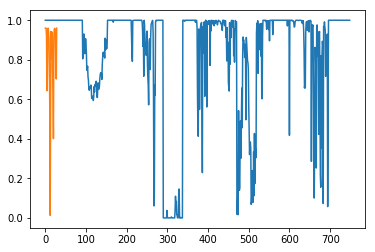

In [0]:
videos_path = fido_videos_path
video_file = 'FidoDidoV3.webm'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'fd'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V3-summ2-FD9

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!
number of frames with the character -  fd  is  613
number of frames without the character -  fd  is  261
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
34
[0.35943870097398756, 0.6861940249800682, 0.8186998111009598, 0.4248644560575485, 0.5068097469210625, 0.8787748026847839, 0.9203801774978637, 0.5618214540928602, 0.7126179003715515, 0.47504130691289903, 0.7318957686424256, 0.9460619974136353, 0.9577280330657959, 0.9599041604995727, 0.9599949932098388, 0.959937949180603, 0.9599999904632568, 0.96, 0.9468538475036621, 0.9584893727302551, 0.8965265965461731, 0.8279156160354614, 0.4271592688234523, 0.3549205883126706, 0.9599999761581421, 0.7698770898533985,

100%|██████████| 414/414 [00:00<00:00, 550.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV9.webm



100%|██████████| 469/469 [00:17<00:00, 26.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV9.webm 



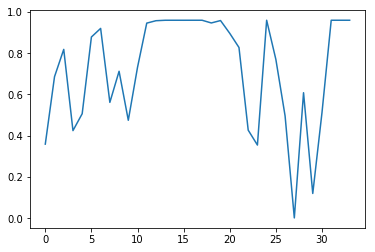

In [0]:
videos_path = fido_videos_path
video_file = 'FidoDidoV9.webm'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'fd'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V7-summ2-FD9

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!


W0705 09:35:20.456090 139855605049216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 09:35:20.457436 139855605049216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 09:35:20.458935 139855605049216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

number of frames with the character -  fd  is  494
number of frames without the character -  fd  is  380
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
34
[0.0061873536353596135, 0.4827182419420569, 0.9190585422515869, 0.30805234710666196, 0.12248123206882411, 0.0016034114966511747, 0.4309857265278697, 0.29759323973395113, 0.321142763580574, 0.43268612509801413, 0.10810787193264787, 0.013808829582592353, 0.3642268453370843, 0.7837950071692467, 0.6820186185261389, 0.9599999618530274, 0.96, 0.96, 0.959960355758667, 0.9599903631210327, 0.8898317515850067, 0.7496332138776779, 0.9049914956092835, 0.8858663058280944, 0.96, 0.6799984703745124, 1.8584791484190796e-07, 0.003482093325947062, 0.5239066514197337, 1.183246100909585e-06, 0.3601426834431142, 0.96, 0.96, 0.96]
(array([ 2, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 31, 32, 33]),)
['1.75:2.25', '12.75:13.25', '14.75:24.25', '30.75:33']

100%|██████████| 282/282 [00:00<00:00, 478.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV9.webm



100%|██████████| 319/319 [00:12<00:00, 25.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV9.webm 



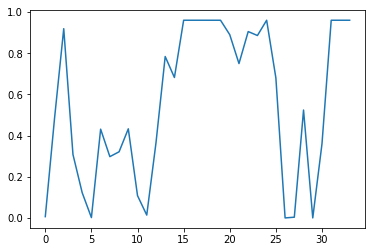

In [0]:
videos_path = fido_videos_path
video_file = 'FidoDidoV9.webm'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'05Jul2019/xception/v7/xception_model.json'
modelWeightsFile = modelFolder+'05Jul2019/xception/v7/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'fd'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V3-summ2-FD7

Frames per second using video.get(cv2.CAP_PROP_FPS) : 1000.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 1000.0
Original frame rate is  25.0
Done!
number of frames with the character -  fd  is  660
number of frames without the character -  fd  is  97
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 1000.0
Original frame rate is  25.0
30
[0.8397632837295532, 0.9347381043434143, 0.9009512591362, 0.950534291267395, 0.8481720519065857, 0.790243194103241, 0.9548166608810424, 0.9592326855659485, 0.9556327128410339, 0.9599976110458374, 0.9586934900283813, 0.8728450214862824, 0.9519554829597473, 0.9587129402160645, 0.9432635617256164, 0.9599909830093384, 0.47992688700556757, 0.7554474997520447, 0.9599115777015687, 0.6100679230690003, 0.6965632569789887, 0.881924397945404, 0.8989450716972351, 0.8332021200656891, 0.7465501880645752, 0.9599

100%|██████████| 574/574 [00:00<00:00, 862.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV7.webm



100%|█████████▉| 650/651 [00:11<00:00, 55.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/summ_1_FidoDidoV7.webm 



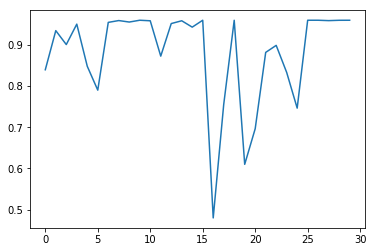

In [0]:
videos_path = fido_videos_path
video_file = 'FidoDidoV7.webm'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'fd'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V3-summ2-MM3

Frames per second using video.get(cv2.CAP_PROP_FPS) : 24.0
fps is original  24.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 24.0
Original frame rate is  24.0
Done!
number of frames with the character -  mm  is  244
number of frames without the character -  mm  is  1126
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 24.0
Original frame rate is  24.0
57
[0.29805204540025443, 0.026144291313054662, 0.019060345288986962, 0.01685694562426458, 0.018307876229907077, 0.02184597065206617, 0.016542905223711084, 0.01860081476237004, 0.01939341037844618, 0.0017760747755346529, 0.00016007250254309233, 0.16066164444259812, 0.09704209265449511, 0.04790114172404477, 0.324586886446923, 0.23218652932155237, 0.16466512541167808, 0.24293994867427196, 0.0889652904685742, 0.3295745286110711, 0.7808961247404417, 0.7602649355928103, 0.7901525075236956, 0.4620752843717734, 

100%|██████████| 149/149 [00:00<00:00, 732.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MickeyMouse/Videos/summ_1_MM_V3.mp4



 99%|█████████▉| 162/163 [00:00<00:00, 495.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MickeyMouse/Videos/summ_1_MM_V3.mp4 



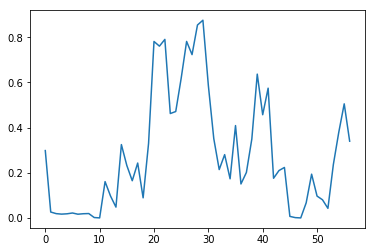

In [0]:
videos_path = mm_videos_path
video_file = 'MM_V3.mp4'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'mm'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V7-summ2-MM3

Frames per second using video.get(cv2.CAP_PROP_FPS) : 24.0
fps is original  24.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 24.0
Original frame rate is  24.0
Done!
number of frames with the character -  mm  is  9
number of frames without the character -  mm  is  1361
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 24.0
Original frame rate is  24.0
57
[0.019219233864816054, 1.9251441048713977e-07, 7.624085562873972e-08, 8.81353545700847e-08, 8.560878872465594e-08, 1.271663851258135e-07, 9.472200438824056e-08, 5.458868836590488e-08, 6.954563243806906e-08, 0.0001441194935670742, 0.0005110675435086401, 0.0023693161480575022, 0.0016640596464299051, 0.010165082369288333, 0.0017678753456209506, 0.007201762546372947, 0.024396972612890977, 0.0012062674126062656, 0.00038004147914096585, 6.966457566726092e-05, 0.0027295196529545742, 0.0012627442095739145, 0.00

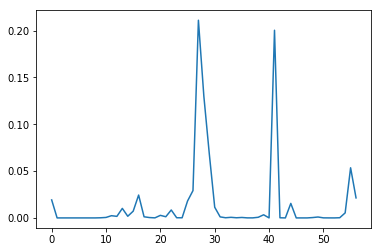

In [0]:
videos_path = mm_videos_path
video_file = 'MM_V3.mp4'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'05Jul2019/xception/v7/xception_model.json'
modelWeightsFile = modelFolder+'05Jul2019/xception/v7/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'mm'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V3-summ2-FC4

Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
fps is original  12.5
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
Done!


W0704 10:05:36.929547 140102045751168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 10:05:36.930766 140102045751168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 10:05:36.932519 140102045751168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

number of frames with the character -  fc  is  1392
number of frames without the character -  fc  is  1215
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
217
[0.12873533740639687, 0.046703722017506756, 0.037664879423876606, 0.03775420133024454, 0.12675163553406796, 0.8358550121386846, 0.7448987364768982, 0.6217310093343258, 0.5853107584019502, 0.6762905642390251, 0.7768298809727033, 0.7704070806503296, 0.5205568472544352, 0.10977047464499871, 0.12464301940053701, 0.23489929301043352, 0.20804835110902786, 0.3669394751389821, 0.6795357912778854, 0.6440626780192057, 0.675472396115462, 0.5018412806093693, 0.20132737141102552, 0.07282110598559181, 0.16372014892597994, 0.07735131168738008, 0.05348791771878799, 0.07994497594578813, 0.07846979608681674, 0.20677699210743108, 0.4852995189527671, 0.26705148195226985, 0.22296827472746372, 0.15001700934953988, 0.3911268711090088, 0.1730859739085038

100%|██████████| 1968/1968 [00:06<00:00, 305.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4.mp4



100%|██████████| 1116/1116 [00:02<00:00, 517.23it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4.mp4 



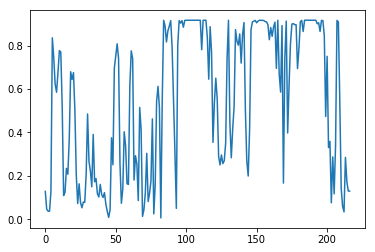

In [0]:
videos_path = fc_videos_path
video_file = 'FC_V4.mp4'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'fc'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Segment FC4 video into 3 sub-videos

In [0]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(fc_videos_path+"FC_V4.mp4", 0, 70, targetname=fc_videos_path+"FC_V4_1.mp4")
ffmpeg_extract_subclip(fc_videos_path+"FC_V4.mp4", 71, 140, targetname=fc_videos_path+"FC_V4_2.mp4")
ffmpeg_extract_subclip(fc_videos_path+"FC_V4.mp4", 141, 208, targetname=fc_videos_path+"FC_V4_3.mp4")


[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4.mp4 -ss 0.00 -t 70.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4_1.mp4
... command successful.

[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4.mp4 -ss 71.00 -t 69.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4_2.mp4
... command successful.

[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4.mp4 -ss 141.00 -t 67.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4_3.mp4
... command successful.


> # Xception-V7-summ2-FC4

Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
fps is original  12.5
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
Done!


W0705 10:19:59.348862 140045685372800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 10:19:59.350326 140045685372800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 10:19:59.352832 140045685372800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

number of frames with the character -  fc  is  637
number of frames without the character -  fc  is  238
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
72
[0.5191075603167216, 0.13664130618174872, 0.11193585706253846, 0.11206769694884618, 0.7520615806182226, 0.9156720240910848, 0.9114106148481369, 0.9061447332302729, 0.9058646510044733, 0.9091392755508423, 0.9115858972072601, 0.9119785378376642, 0.8793102453152338, 0.5731740022699038, 0.46352701478948194, 0.5872093302120144, 0.03273108372619996, 0.6299905174722275, 0.9166657328605652, 0.916455551981926, 0.9095265418291092, 0.9040012905995051, 0.8193742086489996, 0.4750039925177892, 0.3553147961695989, 0.5497778343657652, 0.7290648370981216, 0.8658284842967987, 0.8783087035020193, 0.8764496694008509, 0.9102803816397985, 0.9021004637082418, 0.9079399754603704, 0.6907032144566377, 0.8589959045251211, 0.5513405526677767, 0.6454823724925518

100%|██████████| 844/844 [00:02<00:00, 403.90it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_1.mp4


 96%|█████████▌| 458/479 [00:00<00:00, 563.81it/s]W0705 10:20:41.974643 140045685372800 warnings.py:99] /usr/local/lib/python3.6/dist-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/FC_V4_1.mp4, 82944 bytes wanted but 0 bytes read,at frame 874/876, at time 69.92/70.01 sec. Using the last valid frame instead.
  UserWarning)

100%|██████████| 479/479 [00:00<00:00, 551.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_1.mp4 

Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
fps is original  12.5
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
Done!
number of frames with the character -  fc  is  773
number of frames without the character -  fc  is  81
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
71
[0.42856129857924924, 0.7890545874834061, 0.5508936420083046, 0.5291696315010389, 0.9112749695777893, 0.9164226005474726, 0.915613517165184, 0.8272271181146303, 0.8725041250387827, 0.9166658719380697, 0.9166487157344818, 0.9124126633008321, 0.9136546154816946, 0.9161321967840195, 0.9166654845078787, 0.9166580935319265, 0.9025966177384058, 0.6380685816208521, 0.8072155068318049, 0.82

100%|██████████| 1290/1290 [00:02<00:00, 601.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_2.mp4



100%|██████████| 732/732 [00:01<00:00, 510.61it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_2.mp4 



Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
fps is original  12.5
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
Done!
number of frames with the character -  fc  is  761
number of frames without the character -  fc  is  47
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 12.5
Original frame rate is  12.0
67
[0.9166495005289713, 0.9165524890025457, 0.9166585306326548, 0.9166662693023682, 0.9166125456492106, 0.9166269352038702, 0.9165228605270386, 0.9166326423486074, 0.9162954737742742, 0.9161233603954315, 0.8968128263950348, 0.9157738834619522, 0.9160202542940775, 0.9135439197222391, 0.9165556033452352, 0.9148360540469488, 0.9166665176550547, 0.9166632294654846, 0.8333923672325909, 0.8331273156734321, 0.5415095875990422, 0.8975709080696106, 0.9164473166068395, 0.24081596543112985, 0.9166634678840637, 0.9166

100%|██████████| 1324/1324 [00:01<00:00, 681.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_3.mp4



100%|█████████▉| 750/751 [00:01<00:00, 528.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_3.mp4 



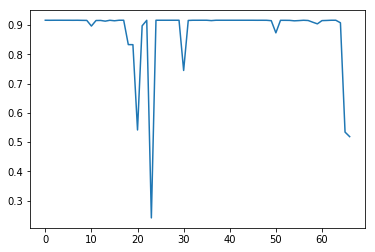

In [0]:
fc_video_list = ['FC_V4_1.mp4','FC_V4_2.mp4','FC_V4_3.mp4']
for fcVideo in fc_video_list:
  videos_path = fc_videos_path
  video_file = fcVideo
  imgFrameFolder = 'VidImg'
  modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
  modelJsonFile = modelFolder+'05Jul2019/xception/v7/xception_model.json'
  modelWeightsFile = modelFolder+'05Jul2019/xception/v7/xception_best_weights.h5'
  model_input_shape = (299,299)
  characterToFind = 'fc'
  vidOutputPath = 'VidOutput'
  fps = 'original'


  summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Join 3 summarized sub-videos of FC4 into final summarized video

In [0]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip1 = VideoFileClip(fc_videos_path+"summ_1_FC_V4_1.mp4")
clip2 = VideoFileClip(fc_videos_path+"summ_1_FC_V4_2.mp4")
clip2 = VideoFileClip(fc_videos_path+"summ_1_FC_V4_3.mp4")
final_clip = concatenate_videoclips([clip1,clip2])
final_clip.write_videofile(fc_videos_path+"summ_1_FC_V4.mp4")

[MoviePy] >>>> Building video /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4.mp4
[MoviePy] Writing audio in summ_1_FC_V4TEMP_MPY_wvf_snd.mp3


100%|██████████| 2169/2169 [00:02<00:00, 749.07it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4.mp4


 99%|█████████▉| 1221/1230 [00:02<00:00, 487.81it/s]W0705 10:23:11.485968 140045685372800 warnings.py:99] /usr/local/lib/python3.6/dist-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4_3.mp4, 82944 bytes wanted but 0 bytes read,at frame 750/751, at time 60.00/60.03 sec. Using the last valid frame instead.
  UserWarning)

100%|██████████| 1230/1230 [00:02<00:00, 476.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/Felix/Videos/summ_1_FC_V4.mp4 



> # Segment MB4 video into 3 sub-videos

In [0]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(mb_videos_path+"MB_V4.mp4", 0, 60, targetname=mb_videos_path+"MB_V4_1.mp4")
ffmpeg_extract_subclip(mb_videos_path+"MB_V4.mp4", 61, 120, targetname=mb_videos_path+"MB_V4_2.mp4")
ffmpeg_extract_subclip(mb_videos_path+"MB_V4.mp4", 121, 153, targetname=mb_videos_path+"MB_V4_3.mp4")


[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4.mp4 -ss 0.00 -t 60.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4_1.mp4
... command successful.

[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4.mp4 -ss 61.00 -t 59.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4_2.mp4
... command successful.

[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4.mp4 -ss 121.00 -t 32.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4_3.mp4
... command successful.


> # Segment MB4 video into 2 sub-videos

In [0]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(mb_videos_path+"MB_V4.mp4", 0, 78, targetname=mb_videos_path+"MB_V4_1.mp4")
ffmpeg_extract_subclip(mb_videos_path+"MB_V4.mp4", 79, 153, targetname=mb_videos_path+"MB_V4_2.mp4")


[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4.mp4 -ss 0.00 -t 78.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4_1.mp4
... command successful.

[MoviePy] Running:
>>> /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1 -y -i /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4.mp4 -ss 79.00 -t 74.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/MB_V4_2.mp4
... command successful.


> # Xception-V3-summ2-MB4 1st sub-video

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!


W0704 12:33:12.779683 140469263382400 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 12:33:12.781001 140469263382400 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0704 12:33:12.782001 140469263382400 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

number of frames with the character -  mb  is  1241
number of frames without the character -  mb  is  634
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
74
[0.5538575839996338, 0.316626131166704, 0.9219052302837372, 0.7552802944369614, 0.027805475327186288, 0.7166678759455681, 0.8552618408203125, 0.9519927787780762, 0.9599992752075195, 0.9599958038330079, 0.9599953985214233, 0.8503638058900833, 0.0834746778011322, 0.07005099177360535, 0.025987770408391953, 0.01588995734229684, 0.46160149171948434, 0.9552378010749817, 0.9562526917457581, 0.46299192726612093, 0.1511295774579048, 0.39314250379800797, 0.9599727964401246, 0.9592210674285888, 0.4447904571890831, 0.7997670033574105, 0.9524337005615234, 0.7247451663017273, 0.5237758231163024, 0.22689451172947883, 0.96, 0.20900624871253967, 0.3995331799983978, 0.96, 0.9599999237060547, 0.8927241188287734, 0.15390157878398894, 0.5395599243044853

100%|██████████| 855/855 [00:02<00:00, 352.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_1.mp4



100%|██████████| 969/969 [00:02<00:00, 471.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_1.mp4 



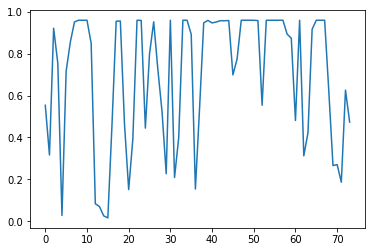

In [0]:
videos_path = mb_videos_path
video_file = 'MB_V4_1.mp4'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'mb'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V3-summ2-MB4 2nd sub-video

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!
number of frames with the character -  mb  is  704
number of frames without the character -  mb  is  1137
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
73
[0.7130388152599335, 0.5066872036457062, 0.5779247736930847, 0.9456950068473816, 0.5698606802523136, 0.5867680369317532, 0.6355697143077851, 0.7327647542953492, 0.9264539813995362, 0.96, 0.96, 0.96, 0.04952776189893484, 0.009928793907165527, 0.01580533020198345, 0.013789392448961735, 0.015082063265144824, 0.13540444295853377, 0.051114216223359106, 0.07443261116743088, 0.033854977115988734, 0.0804915927350521, 0.11726620227098465, 0.09981697142124175, 0.10297389328479767, 0.11527420461177826, 0.1394329

100%|██████████| 408/408 [00:01<00:00, 238.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_2.mp4



100%|██████████| 463/463 [00:00<00:00, 577.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_2.mp4 



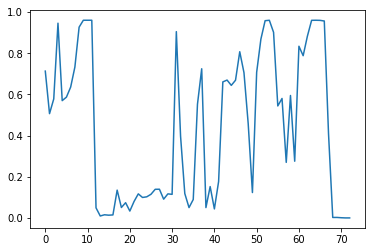

In [0]:
videos_path = mb_videos_path
video_file = 'MB_V4_2.mp4'
imgFrameFolder = 'VidImg'
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
model_input_shape = (299,299)
characterToFind = 'mb'
vidOutputPath = 'VidOutput'
fps = 'original'


summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Xception-V3-summ2-MB4 3 sub-videos

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!


W0705 10:38:54.240396 139806907987840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 10:38:54.241758 139806907987840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 10:38:54.246642 139806907987840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

number of frames with the character -  mb  is  1124
number of frames without the character -  mb  is  301
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
56
[0.7497696654126048, 0.16003419310795836, 0.8680319122411311, 0.7855989338638029, 0.5284076613408979, 0.6812217509141192, 0.8484869068861007, 0.9599991512298583, 0.96, 0.96, 0.96, 0.8400067515374394, 5.233615382167045e-05, 1.9427036386332473e-05, 0.0008398033407866024, 0.019453971702605485, 0.5970778620243072, 0.9599457669258118, 0.9599962425231934, 0.36503840639226837, 0.1319631342589855, 0.3914198651909828, 0.9599998760223388, 0.9599877738952637, 0.5434041178226471, 0.9430687546730041, 0.9599993705749512, 0.9593305039405823, 0.959409658908844, 0.9248967051506043, 0.96, 0.9566850256919861, 0.959658546447754, 0.96, 0.96, 0.959679684638977, 0.8865555769205093, 0.9599055242538452, 0.7397634625434876, 0.2393601919489447, 0.608765204586

100%|██████████| 816/816 [00:01<00:00, 663.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_1.mp4



100%|█████████▉| 925/926 [00:01<00:00, 484.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_1.mp4 

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!
number of frames with the character -  mb  is  548
number of frames without the character -  mb  is  855
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
56
[0.96, 0.36000002584982427, 0.025196476949929086, 0.4000004130137075, 0.96, 0.96, 0.96, 0.7644894268969074, 0.9182041692733764, 0.5815273511689156, 0.4273660825192928, 0.8958098435401917, 0.9105971288681031, 0.5683656711224466, 0.697944445014, 0.9175700664520263, 0.40752732411026954, 0.5405121493339539, 0.7932070648670196, 0.9599999952316284, 0.3414769507944584, 0.8598967992141843

100%|██████████| 260/260 [00:00<00:00, 396.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_2.mp4



100%|██████████| 294/294 [00:00<00:00, 362.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_2.mp4 

Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
fps is original  25.0
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
Done!
number of frames with the character -  mb  is  395
number of frames without the character -  mb  is  294
fps value inside convertVideoToImgFrames method is  original
Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
Original frame rate is  25.0
27
[0.8953649497032166, 0.8773504292964935, 0.6675740740322476, 0.00013571901622526638, 0.8100326401721122, 0.9513757586479187, 0.9599557447433472, 0.9599999856948852, 0.8072205133736133, 0.17931144012603908, 0.38728048666671383, 0.04032652710564435, 0.6498226115107536, 0.2967469394207001, 0.9595309591293335, 0.945004026889801, 0.9596054792404175, 0.96, 0.9599999809265136, 0.95999971

100%|██████████| 243/243 [00:00<00:00, 885.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_3.mp4



100%|█████████▉| 275/276 [00:00<00:00, 602.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_3.mp4 



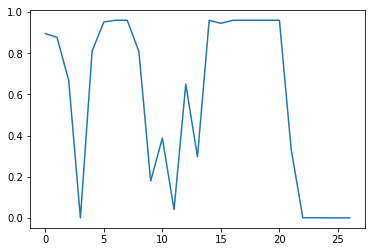

In [0]:
mb_videos_list=['MB_V4_1.mp4','MB_V4_2.mp4','MB_V4_3.mp4']
for mbVideo in mb_videos_list:
  videos_path = mb_videos_path
  video_file = mbVideo
  imgFrameFolder = 'VidImg'
  modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
  modelJsonFile = modelFolder+'05Jul2019/xception/v7/xception_model.json'
  modelWeightsFile = modelFolder+'05Jul2019/xception/v7/xception_best_weights.h5'
  model_input_shape = (299,299)
  characterToFind = 'mb'
  vidOutputPath = 'VidOutput'
  fps = 'original'


  summarizeVideo2(videos_path, video_file, imgFrameFolder, modelJsonFile, modelWeightsFile, model_input_shape, characterToFind, vidOutputPath, fps)

> # Join 3 summarized sub-videos of MB4 into final summ video

In [0]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip1 = VideoFileClip(mb_videos_path+"summ_1_MB_V4_1.mp4")
clip2 = VideoFileClip(mb_videos_path+"summ_1_MB_V4_2.mp4")
clip3 = VideoFileClip(mb_videos_path+"summ_1_MB_V4_3.mp4")
final_clip = concatenate_videoclips([clip1,clip2,clip3])
final_clip.write_videofile(mb_videos_path+"summ_1_MB_V4.mp4")

[MoviePy] >>>> Building video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4.mp4
[MoviePy] Writing audio in summ_1_MB_V4TEMP_MPY_wvf_snd.mp3


100%|██████████| 1321/1321 [00:01<00:00, 904.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4.mp4



 61%|██████    | 916/1497 [00:02<00:01, 357.16it/s]W0705 10:42:50.434647 139806907987840 warnings.py:99] /usr/local/lib/python3.6/dist-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_1.mp4, 110592 bytes wanted but 0 bytes read,at frame 925/927, at time 37.00/37.04 sec. Using the last valid frame instead.
  UserWarning)

 79%|███████▉  | 1186/1497 [00:02<00:00, 492.05it/s]W0705 10:42:50.997877 139806907987840 warnings.py:99] /usr/local/lib/python3.6/dist-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4_2.mp4, 110592 bytes wanted but 0 bytes read,at frame 294/295, at time 11.76/11.78 sec. Using the last valid frame instead.
  UserWarning)

 99%|█████████▉| 1488/1497 [00:03<00:00, 516.18it/s]W0705 10:42:51.505557 139806907987840 warnings.py:99] /usr/local/lib/python3.6/dist-packages/movie

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/MrBean/Videos/summ_1_MB_V4.mp4 



> # <h2>Delete files from root drive directory</h2>

In [0]:
import os
path = '/content/gdrive/My Drive/'
for file in os.listdir(path):
  if file.startswith('frame'):
    print(file)
    os.remove(path+file)

># Saliency Maps

> # <h3>Installations required for saliency maps</h3>

In [0]:
!sudo pip install Pillow==2.6.0

In [0]:
!pip install scipy==0.19.1

> # <h3>Create method showSaliencyMaps</h3>

In [0]:
def showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize, charToFind):
  classesToCharDic = {'fc':0,'fd':1,'mb':2,'mm':3}
  X = cv2.resize(cv2.imread(img_path),resize)/255
  loadedModel = loadModelAndWeights(modelJsonFile, modelWeightsFile)
  # Compile the model
  loadedModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  loadedModel.summary()
  Y_pred = loadedModel.predict(np.expand_dims(X, axis=0))
  print(Y_pred)

  print(loadedModel.input)
  print(loadedModel.output)
  import tensorflow as tf
  charClass = classesToCharDic.get(charToFind)
  print(charClass)
  loss = tf.keras.backend.mean(loadedModel.output[:,charClass])
  grads = tf.keras.backend.gradients(loss, loadedModel.input)[0]
  K = tf.keras.backend
  grads /= K.sqrt(K.mean(K.square(grads)))+K.epsilon()

  iterate = K.function([loadedModel.input],[loss,grads])

  loss_value, grads_value = iterate([np.expand_dims(X,axis=0)])
  print(grads_value.shape)
  print(grads_value.max())

  import matplotlib.pyplot as plt
  %matplotlib inline

  plt.figure(figsize=(15,12))
  plt.subplot(1,2,1)
  plt.imshow(X[...,::-1])
  plt.subplot(1,2,2)
  plt.imshow(grads_value[0].astype('uint8'), cmap='jet')
  plt.show()

> # <h3>Xception-V3 for FidoDido</h3>

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

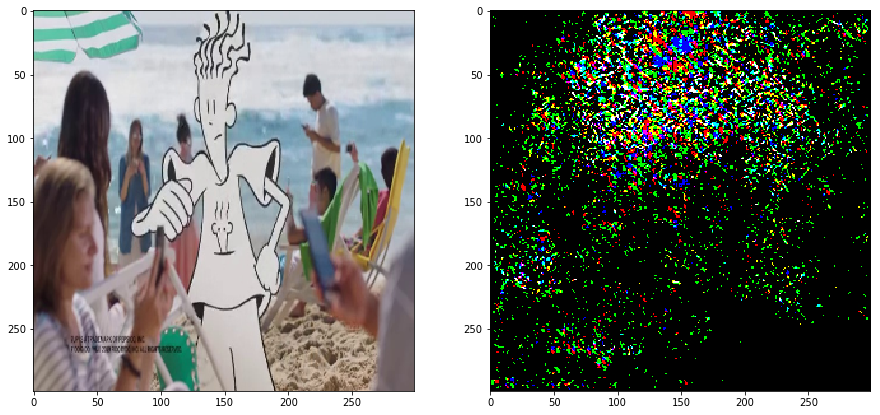

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
fido_img_path = fido_videos_path+'VidImg'+'/'+'FidoDidoV9'+'/'+'frame146.jpg'
resize=(299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,fido_img_path, resize, 'fd')

> # <h3>Xception-V3 for MMV3</h3>

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

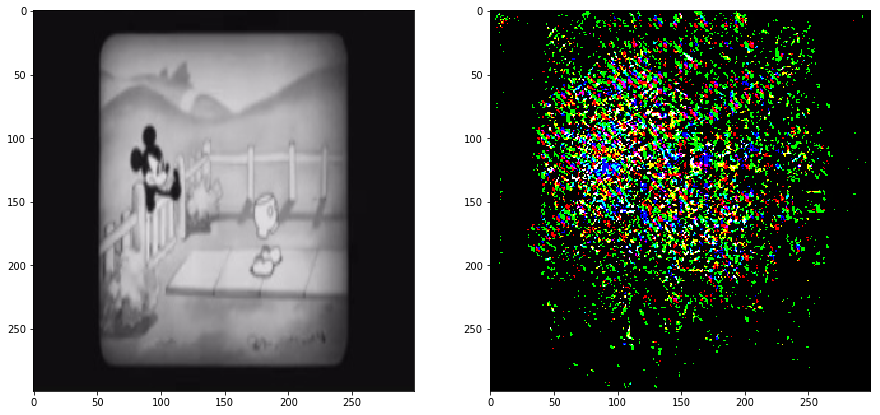

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
img_path = mm_videos_path+'VidImg'+'/'+'MM_V3'+'/'+'frame561.jpg'
resize = (299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path, resize, 'mm')

> # <h3>Xception-V3 for MBV3</h3>

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

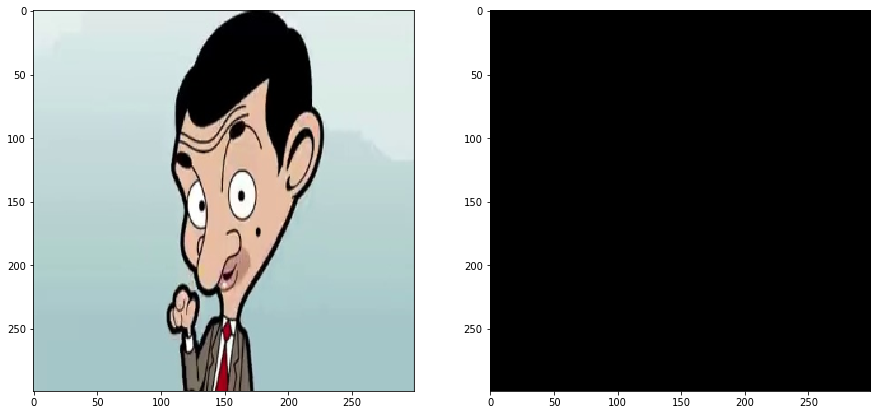

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
img_path = mb_videos_path+'VidImg'+'/'+'MB_V3'+'/'+'frame62.jpg'
resize=(299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'mb')

> # <h3>Xception-V3 for FCV4-Frame136</h3>

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

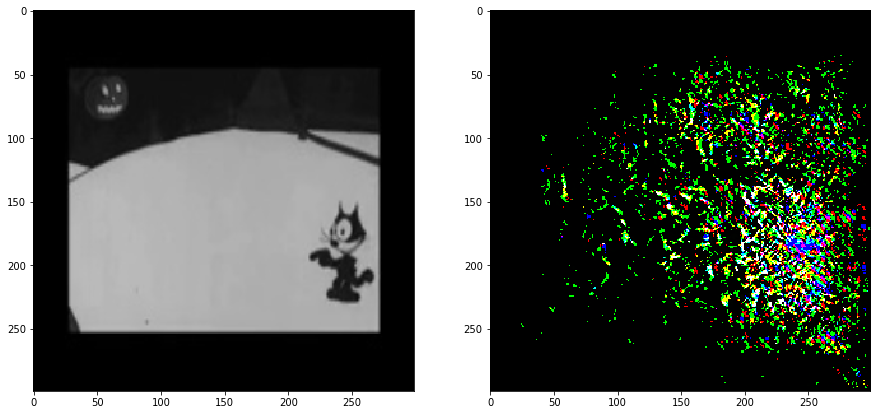

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
img_path = fc_videos_path+'VidImg'+'/'+'FC_V4'+'/'+'frame136.jpg'
resize=(299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'fc')

> # <h3>Xception-V3 for FCV4-Frame163</h3>

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

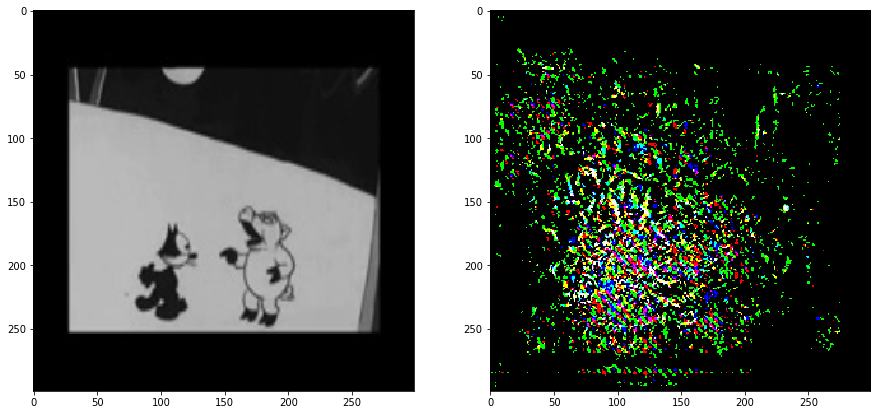

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
img_path = fc_videos_path+'VidImg'+'/'+'FC_V4'+'/'+'frame163.jpg'
resize = (299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'fc')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

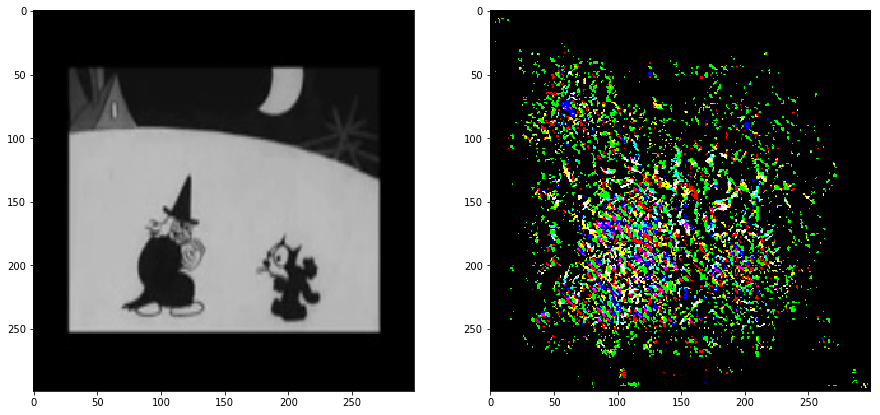

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/xception/v3/xception_model.json'
modelWeightsFile = modelFolder+'20Jun2019/xception/v3/xception_best_weights.h5'
img_path = fc_videos_path+'VidImg'+'/'+'FC_V4'+'/'+'frame388.jpg'
resize=(299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'fc')

># <h3>Xception-V3 for FDV9-frame146</h3>

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

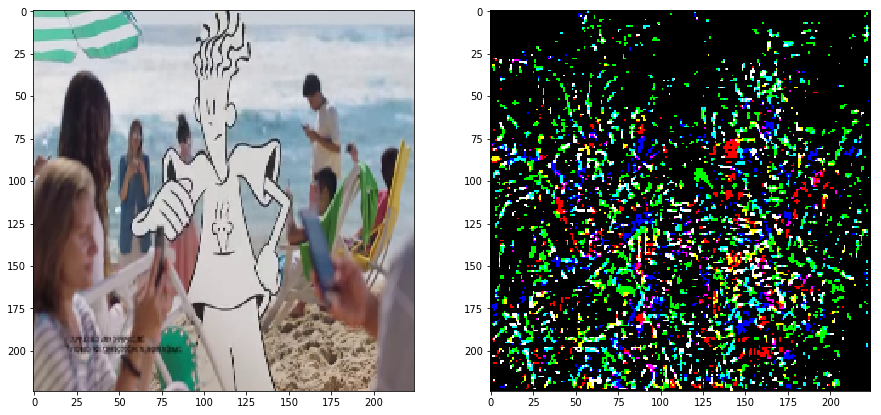

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/vgg19/vgg19_model.json'
modelWeightsFile = modelFolder+'20Jun2019/vgg19/vgg19_best_weights.h5'
img_path = fido_videos_path+'VidImg'+'/'+'FidoDidoV9'+'/'+'frame146.jpg'
resize=(224,224)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'fd')

> # <h3>Xception-V3 for MBV3-frame73</h3>

In [0]:
import cv2

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

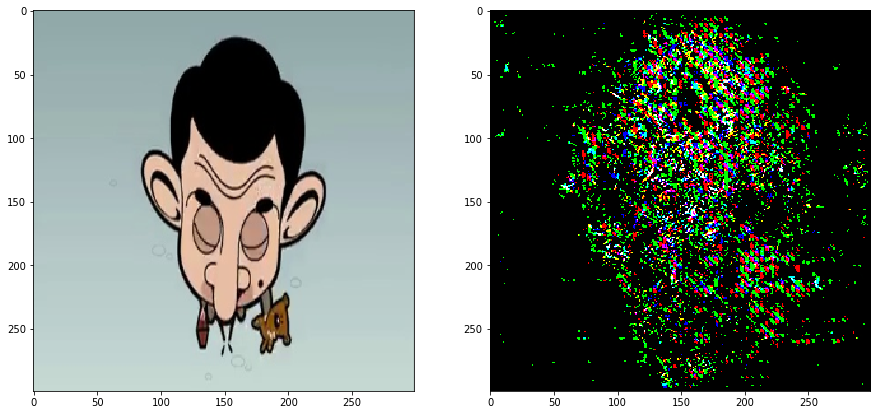

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'05Jul2019/xception/v7/xception_model.json'
modelWeightsFile = modelFolder+'05Jul2019/xception/v7/xception_best_weights.h5'
img_path = mb_videos_path+'VidImg'+'/'+'MB_V3'+'/'+'frame73.jpg'
resize=(299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'mb')

> # <h3>Xception-V7 for MBV3-frame383</h3>

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

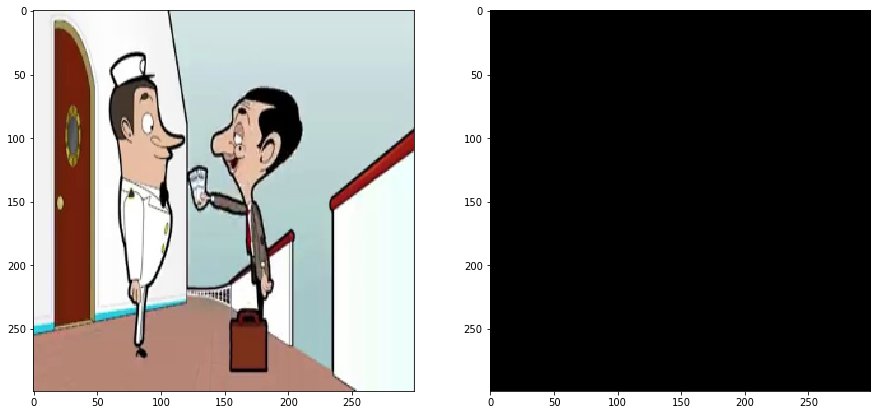

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'05Jul2019/xception/v7/xception_model.json'
modelWeightsFile = modelFolder+'05Jul2019/xception/v7/xception_best_weights.h5'
img_path = mb_videos_path+'VidImg'+'/'+'MB_V3'+'/'+'frame383.jpg'
resize=(299,299)
showSaliencyMaps(modelJsonFile,modelWeightsFile,img_path,resize,'mb')

> # Gradcam

<h2>GradCam</h2>

In [0]:
def gradcam(modelJsonFile,modelWeightsFile,img_path,resize, charToIdentify):
  #Visualize grad-CAM

  from vis.visualization import visualize_cam
  from matplotlib import pyplot as plt
  import numpy as np
  %matplotlib inline
  from vis.utils import utils
  
  
  X = cv2.resize(cv2.imread(img_path),resize)/255
  loadedModel = loadModelAndWeights(modelJsonFile, modelWeightsFile)
  # Compile the model
  loadedModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  loadedModel.summary()
  Y_pred = loadedModel.predict(np.expand_dims(X, axis=0))
  print(Y_pred)

  class_idx = 1
  #indices = np.where(y_test[:, class_idx] == 1.)[0]
  # pick some random input from here.
  #idx = indices[0]
  # Lets sanity check the picked image.
  plt.rcParams['figure.figsize'] = (18, 6)

  plt.imshow(X[..., 0])
  # Utility to search for layer index by name. 
  # Alternatively we can specify this as -1 since it corresponds to the last layer.
  #layer_idx = utils.find_layer_idx(loadedModel, 'block4_pool')
  layer_idx = None

  grads = visualize_cam(loadedModel, layer_idx, filter_indices=class_idx, seed_input=X)

  # Plot with 'jet' colormap to visualize as a heatmap.
  plt.imshow(grads, cmap='jet')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

TypeError: ignored

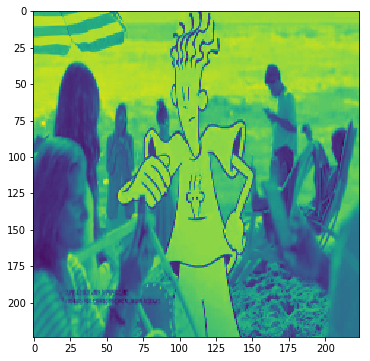

In [0]:
modelFolder = '/content/gdrive/My Drive/Capstone/Characters/Model/'
modelJsonFile = modelFolder+'20Jun2019/vgg16/vgg16_model.json'
modelWeightsFile = modelFolder+'20Jun2019/vgg16/vgg16_best_weights.h5'
img_path = fido_videos_path+'VidImg'+'/'+'FidoDidoV9'+'/'+'frame146.jpg'
resize=(224,224)
gradcam(modelJsonFile,modelWeightsFile,img_path,resize, 'fd')

<h2>Cut video based on timeframe</h2>

In [0]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(fido_videos_path+"FidoDidoV1.webm", 5, 10, targetname=fido_videos_path+"samplecut1.webm")
ffmpeg_extract_subclip(fido_videos_path+"FidoDidoV1.webm", 15, 20, targetname=fido_videos_path+"samplecut2.webm")


[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/FidoDidoV1.webm -ss 5.00 -t 5.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/samplecut1.webm
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/FidoDidoV1.webm -ss 15.00 -t 5.00 -vcodec copy -acodec copy /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/samplecut2.webm
... command successful.


In [0]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip1 = VideoFileClip(fido_videos_path+"FidoDidoV1.webm").subclip(0,2)
clip2 = VideoFileClip(fido_videos_path+"FidoDidoV1.webm").subclip(5,10)
clip3 = VideoFileClip(fido_videos_path+"FidoDidoV1.webm").subclip(15,20)
final_clip = concatenate_videoclips([clip1,clip2,clip3])
final_clip.write_videofile(fido_videos_path+"samplecut.webm")

[MoviePy] >>>> Building video /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/samplecut.webm
[MoviePy] Writing audio in samplecutTEMP_MPY_wvf_snd.ogg


100%|██████████| 265/265 [00:00<00:00, 639.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/samplecut.webm



100%|█████████▉| 300/301 [00:06<00:00, 48.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/My Drive/Capstone/Characters/FidoDido/Videos/samplecut.webm 

